In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [8]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 2 LAYER ARCHITECTURE WITH DROPOUT(0.5) AND BATCH NORMALIZATION WITH ACTIVATION RELU

In [9]:
from keras.models import Sequential 
from keras.layers import Dense, Activation

In [10]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 256 
nb_epoch = 20

In [11]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout


model_relu = Sequential()
model_relu.add(Dense(364, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dropout(0.5))
model_relu.add(BatchNormalization())
model_relu.add(Dense(52, activation='relu'))
model_relu.add(Dropout(0.5))
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 364)               285740    
_________________________________________________________________
dropout_1 (Dropout)          (None, 364)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 364)               1456      
_________________________________________________________________
dense_2 (Dense)              (None, 52)                18980     
_________________________________________________________________
dropout_2 (Dropout)          (None, 52)                0         
_________________________________________________________________
batch_normalization_2

In [12]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.6194 - acc: 0.8211 - val_loss: 0.1730 - val_acc: 0.9491
Epoch 2/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3024 - acc: 0.9167 - val_loss: 0.1259 - val_acc: 0.9627
Epoch 3/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.2379 - acc: 0.9338 - val_loss: 0.1064 - val_acc: 0.9691
Epoch 4/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2058 - acc: 0.9427 - val_loss: 0.1021 - val_acc: 0.9698
Epoch 5/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.1960 - acc: 0.9457 - val_loss: 0.0978 - val_acc: 0.9702
Epoch 6/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.1787 - acc: 0.9501 - val_loss: 0.0887 - val_acc: 0.9728
Epoch 7/20
60000/60000 [==============================] - 3s 55us/step - loss: 0

Test score: 0.06967618248889922
Test accuracy: 0.9804


<IPython.core.display.Javascript object>


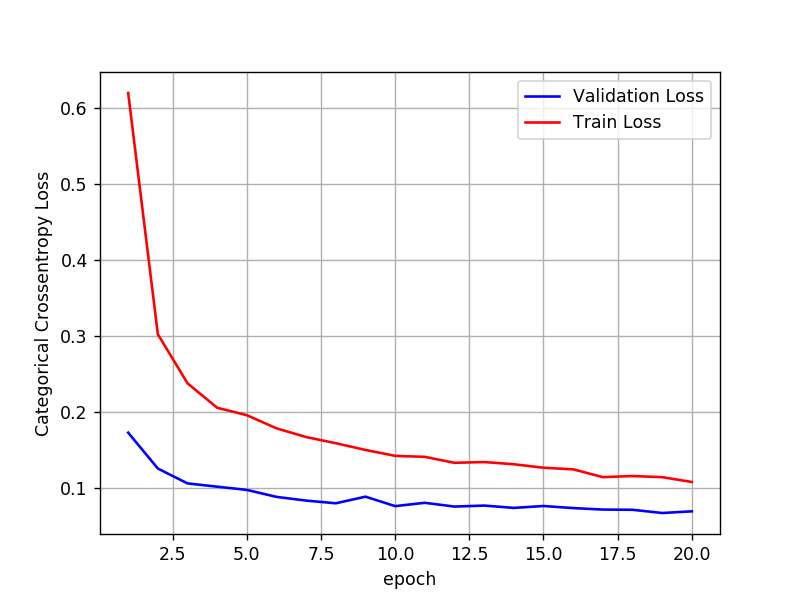

In [13]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 3  LAYER ARCHITECTURE WITH DROPOUT(0.5) AND BATCH NORMALIZATION WITH ACTIVATION RELU

In [14]:
model_relu_2 = Sequential()
model_relu_2.add(Dense(484, activation='relu', input_shape=(input_dim,)))
model_relu_2.add(Dropout(0.5))
model_relu_2.add(BatchNormalization())
model_relu_2.add(Dense(212, activation='relu'))
model_relu_2.add(Dropout(0.5))
model_relu_2.add(BatchNormalization())
model_relu_2.add(Dense(64, activation='relu'))
model_relu_2.add(Dropout(0.5))
model_relu_2.add(BatchNormalization())
model_relu_2.add(Dense(output_dim, activation='softmax'))

model_relu_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 484)               379940    
_________________________________________________________________
dropout_3 (Dropout)          (None, 484)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 484)               1936      
_________________________________________________________________
dense_5 (Dense)              (None, 212)               102820    
_________________________________________________________________
dropout_4 (Dropout)          (None, 212)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 212)               848       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                13632     
__________

In [15]:
model_relu_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.7047 - acc: 0.7929 - val_loss: 0.1713 - val_acc: 0.9499
Epoch 2/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.3029 - acc: 0.9193 - val_loss: 0.1254 - val_acc: 0.9642
Epoch 3/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2439 - acc: 0.9348 - val_loss: 0.1091 - val_acc: 0.9683
Epoch 4/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.2092 - acc: 0.9439 - val_loss: 0.0926 - val_acc: 0.9726
Epoch 5/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.1863 - acc: 0.9504 - val_loss: 0.0974 - val_acc: 0.9709
Epoch 6/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.1761 - acc: 0.9523 - val_loss: 0.0861 - val_acc: 0.9750
Epoch 7/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.1598 - acc: 0.9580 - val_loss: 0.0825 - val_acc

Test score: 0.06834373725345941
Test accuracy: 0.9819


<IPython.core.display.Javascript object>


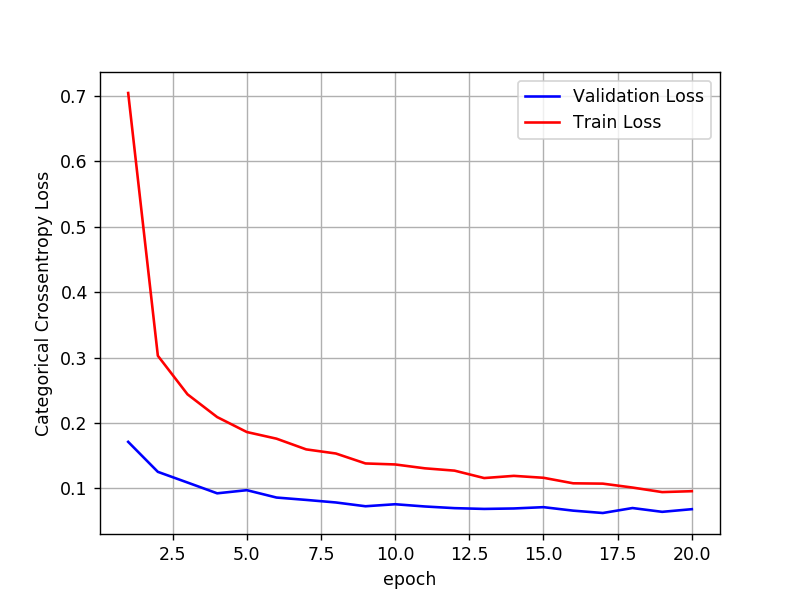

In [16]:
score = model_relu_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 5 LAYER ARCHITECTURE WITH DROPOUT(0.5) AND BATCH NORMALIZATION WITH ACTIVATION RELU

In [17]:
model_relu_3 = Sequential()
model_relu_3.add(Dense(564, activation='relu', input_shape=(input_dim,)))
model_relu_3.add(Dropout(0.5))
model_relu_3.add(BatchNormalization())
model_relu_3.add(Dense(412, activation='relu'))
model_relu_3.add(Dropout(0.5))
model_relu_3.add(BatchNormalization())
model_relu_3.add(Dense(256, activation='relu'))
model_relu_3.add(Dropout(0.5))
model_relu_3.add(BatchNormalization())
model_relu_3.add(Dense(128, activation='relu'))
model_relu_3.add(Dropout(0.5))
model_relu_3.add(BatchNormalization())
model_relu_3.add(Dense(64, activation='relu'))
model_relu_3.add(Dropout(0.5))
model_relu_3.add(BatchNormalization())
model_relu_3.add(Dense(output_dim, activation='softmax'))

model_relu_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 564)               442740    
_________________________________________________________________
dropout_6 (Dropout)          (None, 564)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 564)               2256      
_________________________________________________________________
dense_9 (Dense)              (None, 412)               232780    
_________________________________________________________________
dropout_7 (Dropout)          (None, 412)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 412)               1648      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               105728    
__________

In [18]:
model_relu_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 124us/step - loss: 1.2043 - acc: 0.6099 - val_loss: 0.2588 - val_acc: 0.9322
Epoch 2/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.4386 - acc: 0.8846 - val_loss: 0.1711 - val_acc: 0.9535
Epoch 3/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.3352 - acc: 0.9175 - val_loss: 0.1414 - val_acc: 0.9625
Epoch 4/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.2842 - acc: 0.9310 - val_loss: 0.1197 - val_acc: 0.9692
Epoch 5/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2556 - acc: 0.9385 - val_loss: 0.1239 - val_acc: 0.9690
Epoch 6/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.2330 - acc: 0.9447 - val_loss: 0.1186 - val_acc: 0.9694
Epoch 7/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2165 - acc: 0.9493 - val_loss: 0.0969 - val_ac

Test score: 0.07426590730494353
Test accuracy: 0.9811


<IPython.core.display.Javascript object>


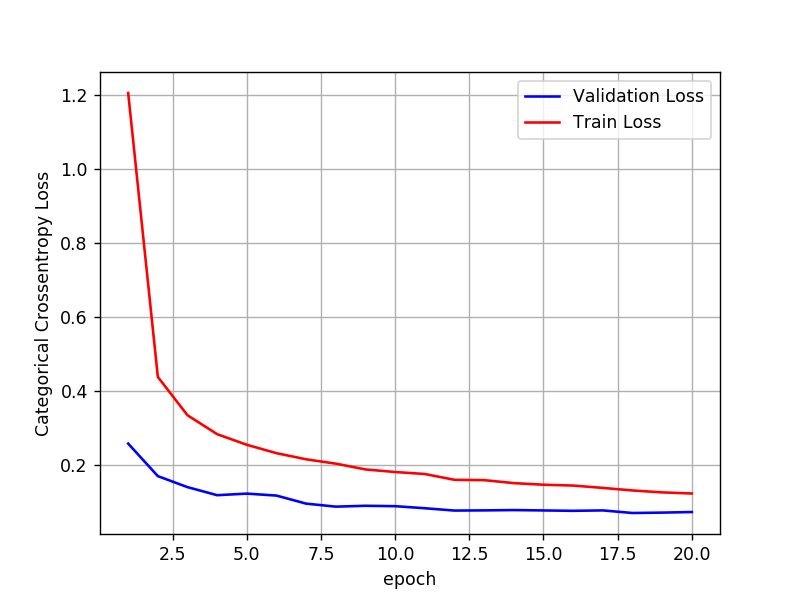

In [19]:
score = model_relu_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 2 LAYER ARCHITECTURE WITHOUT  DROPOUT AND BATCH NORMALIZATION

In [20]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout


model_relu_4 = Sequential()
model_relu_4.add(Dense(484, activation='relu', input_shape=(input_dim,)))
model_relu_4.add(Dense(64, activation='relu'))
model_relu_4.add(Dense(output_dim, activation='softmax'))

model_relu_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 484)               379940    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                31040     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 411,630
Trainable params: 411,630
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_relu_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_4.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3236 - acc: 0.9080 - val_loss: 0.1387 - val_acc: 0.9584
Epoch 2/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.1183 - acc: 0.9649 - val_loss: 0.1033 - val_acc: 0.9688
Epoch 3/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0750 - acc: 0.9778 - val_loss: 0.0786 - val_acc: 0.9755
Epoch 4/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0549 - acc: 0.9839 - val_loss: 0.0782 - val_acc: 0.9758
Epoch 5/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0391 - acc: 0.9886 - val_loss: 0.0668 - val_acc: 0.9783
Epoch 6/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0285 - acc: 0.9914 - val_loss: 0.0694 - val_acc: 0.9785
Epoch 7/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0210 - acc: 0.9942 - val_loss: 0.0670 - val_acc

Test score: 0.09367929859978971
Test accuracy: 0.9787


<IPython.core.display.Javascript object>


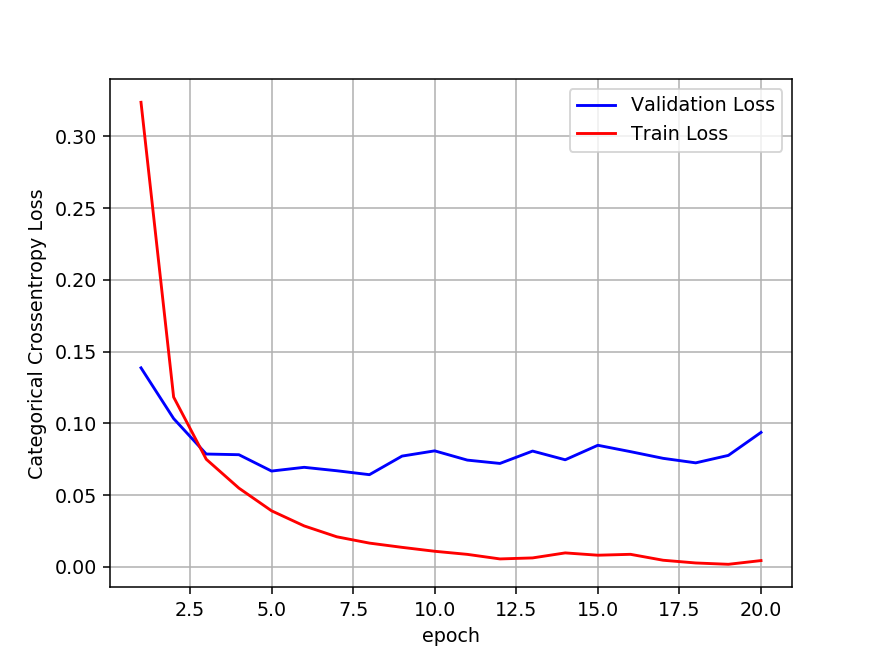

In [22]:
score = model_relu_4.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 3 LAYER ARCHITECTURE WITHOUT DROPOUT AND BATCH NORMALIZATION

In [23]:
model_relu_5 = Sequential()
model_relu_5.add(Dense(484, activation='relu', input_shape=(input_dim,)))
model_relu_5.add(Dense(212, activation='relu'))
model_relu_5.add(BatchNormalization())
model_relu_5.add(Dense(64, activation='relu'))
model_relu_5.add(BatchNormalization())
model_relu_5.add(Dense(output_dim, activation='softmax'))

model_relu_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 484)               379940    
_________________________________________________________________
dense_14 (Dense)             (None, 212)               102820    
_________________________________________________________________
batch_normalization_6 (Batch (None, 212)               848       
_________________________________________________________________
dense_15 (Dense)             (None, 64)                13632     
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                650       
Total params: 498,146
Trainable params: 497,594
Non-trainable params: 552
_________________________________________________________________


In [24]:
model_relu_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.2258 - acc: 0.9359 - val_loss: 0.1063 - val_acc: 0.9677
Epoch 2/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0823 - acc: 0.9757 - val_loss: 0.0960 - val_acc: 0.9705
Epoch 3/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0519 - acc: 0.9847 - val_loss: 0.0985 - val_acc: 0.9693
Epoch 4/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.0345 - acc: 0.9892 - val_loss: 0.0853 - val_acc: 0.9733
Epoch 5/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0269 - acc: 0.9915 - val_loss: 0.0753 - val_acc: 0.9770
Epoch 6/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0186 - acc: 0.9944 - val_loss: 0.0757 - val_acc: 0.9764
Epoch 7/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.0171 - acc: 0.9948 - val_loss: 0.0780 - val

Test score: 0.08906617645227526
Test accuracy: 0.9775


<IPython.core.display.Javascript object>


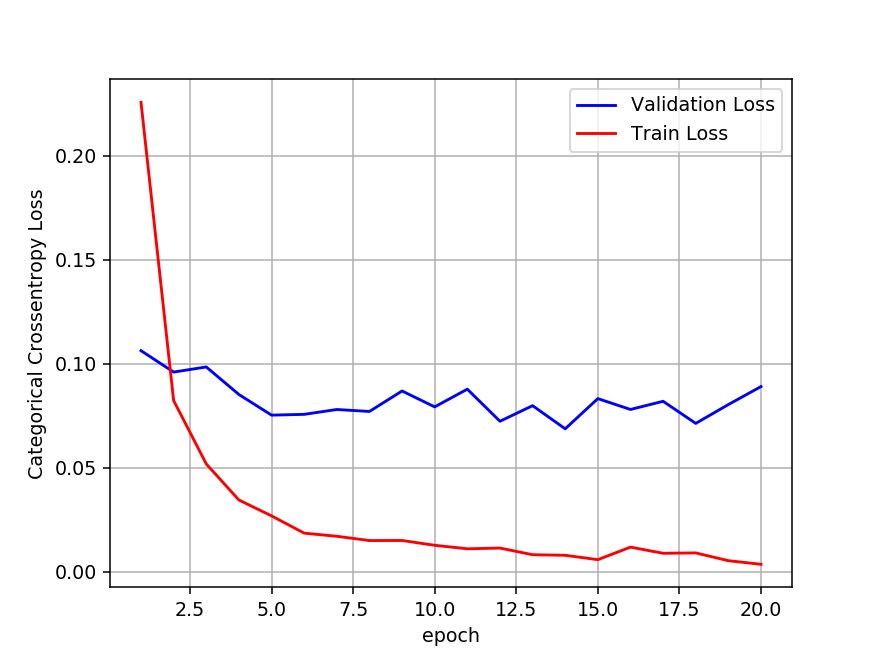

In [25]:
score = model_relu_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 5 LAYER ARCHITECTURE WITHOUT DROPOUT AND BATCH NORMALIZATION

In [26]:
model_relu_6 = Sequential()
model_relu_6.add(Dense(564, activation='relu', input_shape=(input_dim,)))
model_relu_6.add(Dense(412, activation='relu'))
model_relu_6.add(Dense(256, activation='relu'))
model_relu_6.add(Dense(128, activation='relu'))
model_relu_6.add(Dense(64, activation='relu'))
model_relu_6.add(Dense(output_dim, activation='softmax'))

model_relu_6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 564)               442740    
_________________________________________________________________
dense_18 (Dense)             (None, 412)               232780    
_________________________________________________________________
dense_19 (Dense)             (None, 256)               105728    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                650       
Total params: 823,050
Trainable params: 823,050
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_relu_6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_6.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2846 - acc: 0.9130 - val_loss: 0.1147 - val_acc: 0.9655
Epoch 2/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0950 - acc: 0.9705 - val_loss: 0.0871 - val_acc: 0.9729
Epoch 3/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0624 - acc: 0.9800 - val_loss: 0.0742 - val_acc: 0.9785
Epoch 4/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0449 - acc: 0.9858 - val_loss: 0.0672 - val_acc: 0.9787
Epoch 5/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0334 - acc: 0.9894 - val_loss: 0.0817 - val_acc: 0.9784
Epoch 6/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0283 - acc: 0.9907 - val_loss: 0.0784 - val_acc: 0.9790
Epoch 7/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0253 - acc: 0.9914 - val_loss: 0.0691 - val_acc

Test score: 0.09870356189140862
Test accuracy: 0.9804


<IPython.core.display.Javascript object>


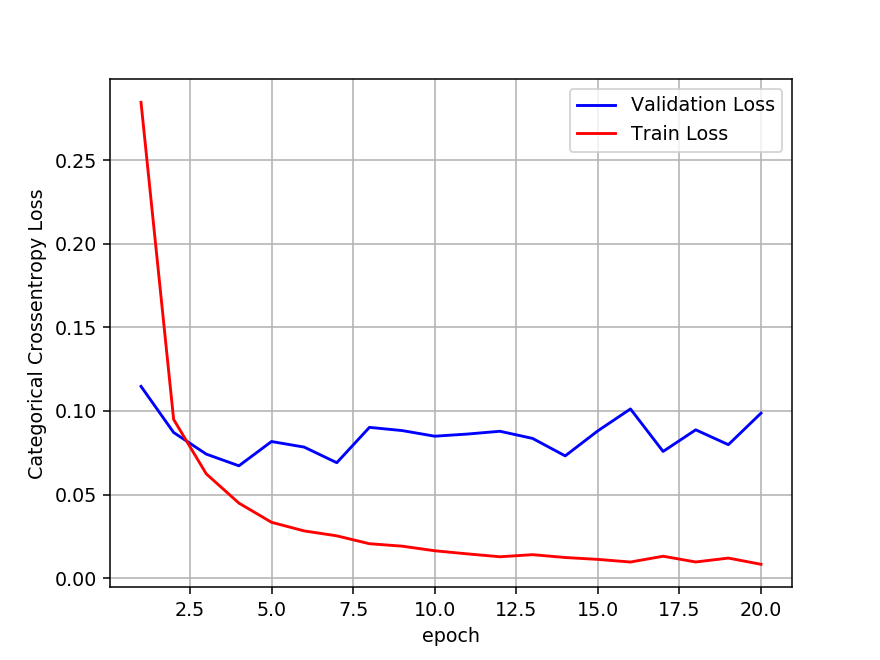

In [28]:
score = model_relu_6.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 2 LAYER ARCHITECTURE WITH DROPOUT(0.5) AND BATCH NORMALIZATION AND ACTIVATION SIGMOID

In [45]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout


model_sigmoid = Sequential()
model_sigmoid.add(Dense(364, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Dense(52, activation='sigmoid'))
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 364)               285740    
_________________________________________________________________
dropout_19 (Dropout)         (None, 364)               0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 364)               1456      
_________________________________________________________________
dense_42 (Dense)             (None, 52)                18980     
_________________________________________________________________
dropout_20 (Dropout)         (None, 52)                0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 52)                208       
_________________________________________________________________
dense_43 (Dense)             (None, 10)                530       
Total para

In [46]:
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 85us/step - loss: 1.1019 - acc: 0.6520 - val_loss: 0.3590 - val_acc: 0.9048
Epoch 2/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.4916 - acc: 0.8604 - val_loss: 0.2455 - val_acc: 0.9265
Epoch 3/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.3797 - acc: 0.8926 - val_loss: 0.1992 - val_acc: 0.9395
Epoch 4/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.3190 - acc: 0.9099 - val_loss: 0.1676 - val_acc: 0.9483
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.2775 - acc: 0.9226 - val_loss: 0.1491 - val_acc: 0.9545
Epoch 6/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.2490 - acc: 0.9305 - val_loss: 0.1320 - val_acc: 0.9600
Epoch 7/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.2260 - acc: 0.9369 - val_loss: 0.1197 - val_acc

Test score: 0.07422105259281817
Test accuracy: 0.977


<IPython.core.display.Javascript object>


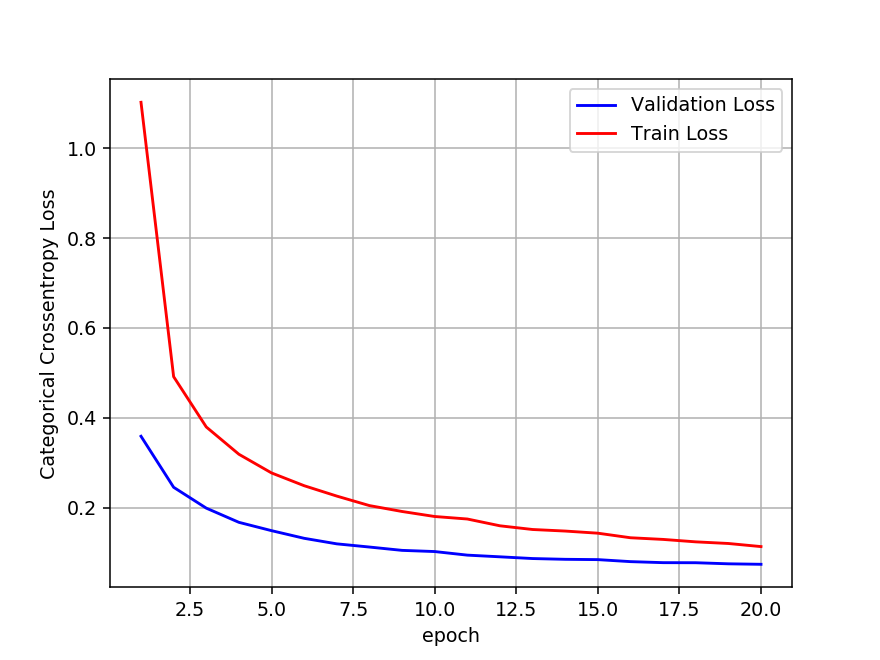

In [47]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 3 LAYER ARCHITECTURE WITH DROPOUT(0.5) AND BATCH NORMALIZATION AND ACTIVATION SIGMOID

In [48]:
model_sigmoid_2 = Sequential()
model_sigmoid_2.add(Dense(484, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid_2.add(Dropout(0.5))
model_sigmoid_2.add(BatchNormalization())
model_sigmoid_2.add(Dense(212, activation='sigmoid'))
model_sigmoid_2.add(Dropout(0.5))
model_sigmoid_2.add(BatchNormalization())
model_sigmoid_2.add(Dense(64, activation='sigmoid'))
model_sigmoid_2.add(Dropout(0.5))
model_sigmoid_2.add(BatchNormalization())
model_sigmoid_2.add(Dense(output_dim, activation='softmax'))

model_sigmoid_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 484)               379940    
_________________________________________________________________
dropout_21 (Dropout)         (None, 484)               0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 484)               1936      
_________________________________________________________________
dense_45 (Dense)             (None, 212)               102820    
_________________________________________________________________
dropout_22 (Dropout)         (None, 212)               0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 212)               848       
_________________________________________________________________
dense_46 (Dense)             (None, 64)                13632     
__________

In [49]:
model_sigmoid_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 155us/step - loss: 1.2851 - acc: 0.5820 - val_loss: 0.3525 - val_acc: 0.9033
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.4941 - acc: 0.8630 - val_loss: 0.2295 - val_acc: 0.9327
Epoch 3/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.3527 - acc: 0.9052 - val_loss: 0.1768 - val_acc: 0.9459
Epoch 4/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.2853 - acc: 0.9240 - val_loss: 0.1432 - val_acc: 0.9569
Epoch 5/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.2401 - acc: 0.9353 - val_loss: 0.1242 - val_acc: 0.9620
Epoch 6/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.2142 - acc: 0.9419 - val_loss: 0.1150 - val_acc: 0.9644
Epoch 7/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.1934 - acc: 0.9472 - val_loss: 0.1051 - v

Test score: 0.06643162165306275
Test accuracy: 0.9817


<IPython.core.display.Javascript object>


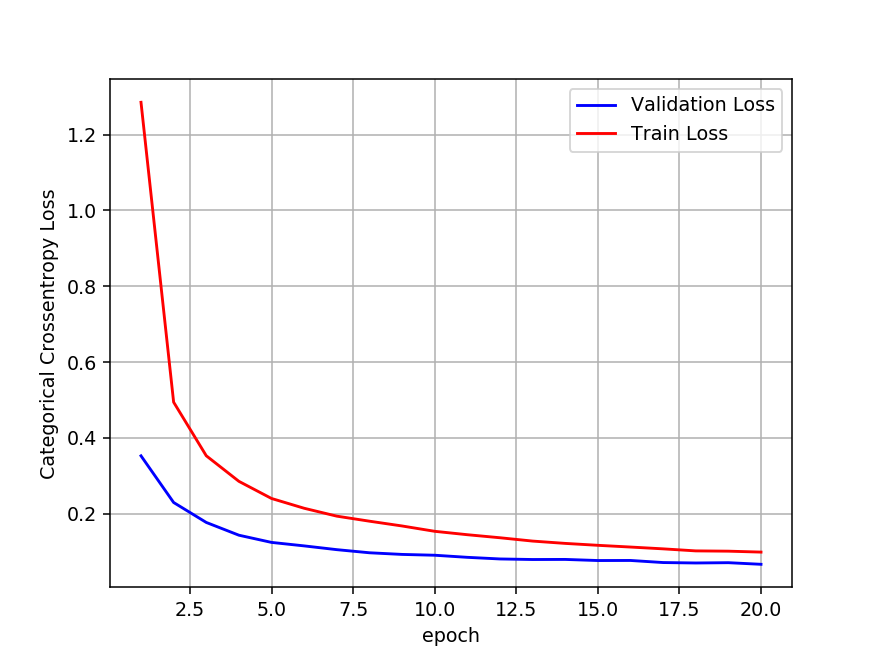

In [50]:
score = model_sigmoid_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 5 LAYER ARCHITECTURE WITH DROPOUT(0.5) AND BATCH NORMALIZATION AND ACTIVATION SIGMOID

In [51]:
model_sigmoid_3 = Sequential()
model_sigmoid_3.add(Dense(564, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid_3.add(Dropout(0.5))
model_sigmoid_3.add(BatchNormalization())
model_sigmoid_3.add(Dense(412, activation='sigmoid'))
model_sigmoid_3.add(Dropout(0.5))
model_sigmoid_3.add(BatchNormalization())
model_sigmoid_3.add(Dense(256, activation='sigmoid'))
model_sigmoid_3.add(Dropout(0.5))
model_sigmoid_3.add(BatchNormalization())
model_sigmoid_3.add(Dense(128, activation='sigmoid'))
model_sigmoid_3.add(Dropout(0.5))
model_sigmoid_3.add(BatchNormalization())
model_sigmoid_3.add(Dense(64, activation='sigmoid'))
model_sigmoid_3.add(Dropout(0.5))
model_sigmoid_3.add(BatchNormalization())
model_sigmoid_3.add(Dense(output_dim, activation='softmax'))

model_sigmoid_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 564)               442740    
_________________________________________________________________
dropout_24 (Dropout)         (None, 564)               0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 564)               2256      
_________________________________________________________________
dense_49 (Dense)             (None, 412)               232780    
_________________________________________________________________
dropout_25 (Dropout)         (None, 412)               0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 412)               1648      
_________________________________________________________________
dense_50 (Dense)             (None, 256)               105728    
__________

In [52]:
model_sigmoid_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 208us/step - loss: 1.8381 - acc: 0.3768 - val_loss: 0.5814 - val_acc: 0.8421
Epoch 2/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.6626 - acc: 0.8150 - val_loss: 0.2606 - val_acc: 0.9329
Epoch 3/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.4043 - acc: 0.9073 - val_loss: 0.2036 - val_acc: 0.9491
Epoch 4/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.3191 - acc: 0.9278 - val_loss: 0.1613 - val_acc: 0.9581
Epoch 5/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.2753 - acc: 0.9359 - val_loss: 0.1361 - val_acc: 0.9642
Epoch 6/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.2415 - acc: 0.9433 - val_loss: 0.1202 - val_acc: 0.9664
Epoch 7/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.2225 - acc: 0.9471 - val_loss: 0.1140 -

Test score: 0.08784358917449135
Test accuracy: 0.9803


<IPython.core.display.Javascript object>


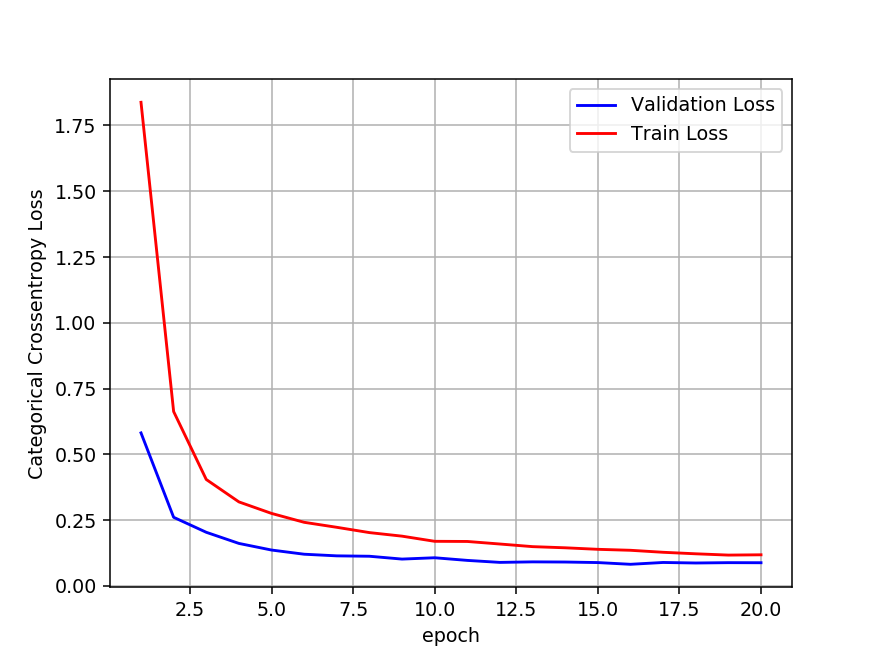

In [53]:
score = model_sigmoid_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [58]:
from prettytable import PrettyTable

pretty = PrettyTable()

pretty.field_names = ['S.No','MODEL','ACTIVATION','train_accuracy','test_accuracy','train_loss','test_loss']

pretty.add_row(['1','2-LAYER MLP WITH DROPOUT AND BN','RELU','0.9686','0.9804','0.1803','0.0697'])
pretty.add_row(['2','3-LAYER MLP WITH DROPOUT AND BN','RELU','0.9736','0.9819','0.0958','0.0683'])
pretty.add_row(['3','5-LAYER MLP WITH DROPOUT AND BN','RELU','0.9704','0.9811','0.1242','0.0743'])
pretty.add_row(['1','2-LAYER MLP WITHOUT DROPOUT AND BN','NO','0.9986','0.9787','0.0044','0.0937'])
pretty.add_row(['2','3-LAYER MLP WITHOUT DROPOUT AND BN','NO','0.9989','0.9775','0.0036','0.0697'])
pretty.add_row(['3','5-LAYER MLP WITHOUT DROPOUT AND BN','NO','0.9975','0.9804','0.0083','0.987'])
pretty.add_row(['1','2-LAYER MLP WITH DROPOUT AND BN','SIGMOID','0.9675','0.9770','0.1136','0.0742'])
pretty.add_row(['2','3-LAYER MLP WITH DROPOUT AND BN','SIGMOID','0.9730','0.9812','0.0986','0.0664'])
pretty.add_row(['3','5-LAYER MLP WITH DROPOUT AND BN','SIGMOID','0.9711','0.9803','0.1180','0.0878'])



print(pretty)

+------+------------------------------------+------------+----------------+---------------+------------+-----------+
| S.No |               MODEL                | ACTIVATION | train_accuracy | test_accuracy | train_loss | test_loss |
+------+------------------------------------+------------+----------------+---------------+------------+-----------+
|  1   |  2-LAYER MLP WITH DROPOUT AND BN   |    RELU    |     0.9686     |     0.9804    |   0.1803   |   0.0697  |
|  2   |  3-LAYER MLP WITH DROPOUT AND BN   |    RELU    |     0.9736     |     0.9819    |   0.0958   |   0.0683  |
|  3   |  5-LAYER MLP WITH DROPOUT AND BN   |    RELU    |     0.9704     |     0.9811    |   0.1242   |   0.0743  |
|  1   | 2-LAYER MLP WITHOUT DROPOUT AND BN |     NO     |     0.9986     |     0.9787    |   0.0044   |   0.0937  |
|  2   | 3-LAYER MLP WITHOUT DROPOUT AND BN |     NO     |     0.9989     |     0.9775    |   0.0036   |   0.0697  |
|  3   | 5-LAYER MLP WITHOUT DROPOUT AND BN |     NO     |     0

### PROCEDURE :
* STEP 1 => Constructing 2,3,5 layer architecture with dropout rate=0.5 and batch normalization and activation = relu
* STEP 2 => fit and validate each architecture
* STEP 3 => Constructing 2,3,5 layer architecture without dropout ,batch normalization and activation = relu
* STEP 4 => fit and validate each architecture
* STEP 5 => Constructing 2,3,5 layer architecture with dropout rate = 0.5 and batch normalization and activation = sigmoid
* STEP 6 => fit and validate each architecture

### OBSERVATION
* Models without dropout and batch normalization works badly.